<a href="https://www.kaggle.com/code/maicmi/visualize-stock-market-cap-using-choropleth?scriptVersionId=131590245" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Ranking Countries by Stock Market Capitalization

The following list sorts countries by the total market capitalization of all domestic companies listed in the country, according to data from the World Bank. Market capitalization, commonly called market cap, is the market value of a publicly traded company's outstanding shares.

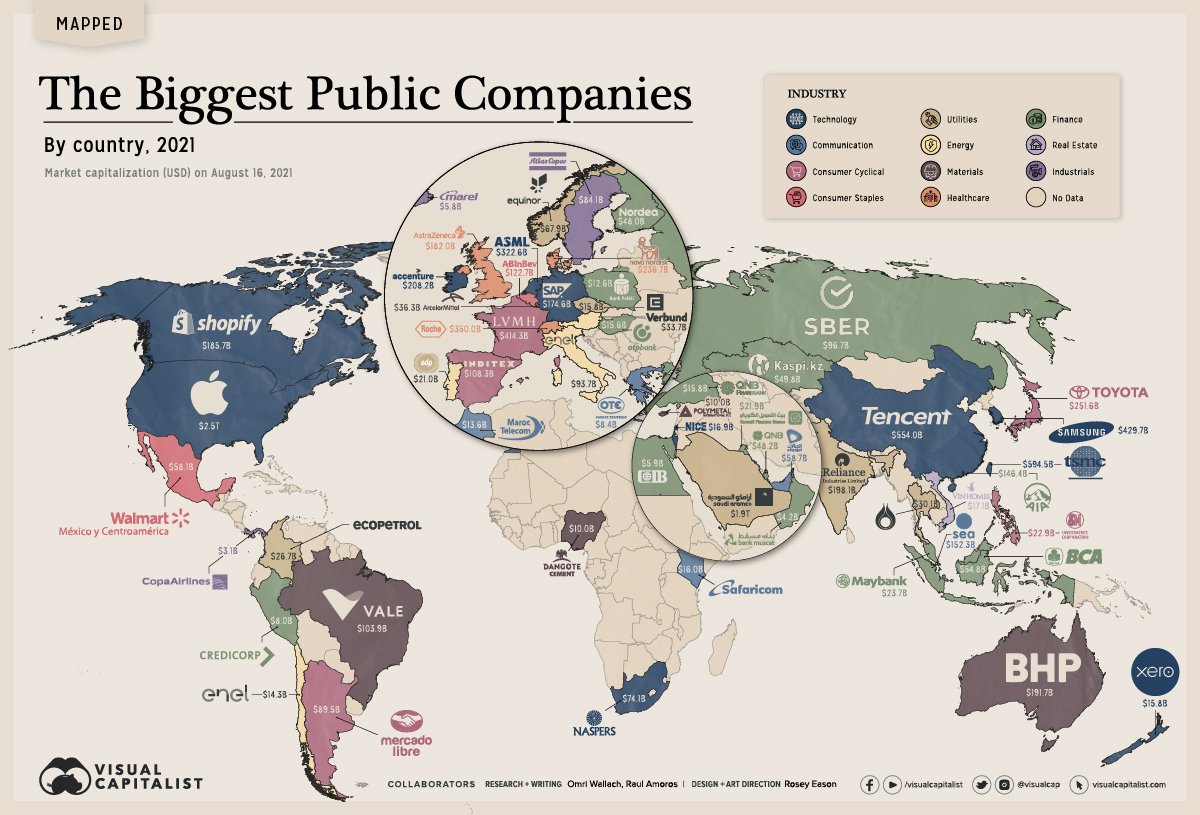

credit image: https://www.visualcapitalist.com/mapping-the-biggest-companies-by-market-cap-in-60-countries/
## Agenda
* Get the Stock Market Capitalization data from Wikipedia using Selenium and plot Choropleth
* Plot the line and analyze second table, Historical development of world market capitalization

## Analyzing the stock market capitalization using the following components:
* Selenium to get Stock Market Capitalization
* pycountry to generate ISO alpha 3 country code
* plotly to plot Choropleth map

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
@import url("https://fonts.googleapis.com/css2?family=Raleway&family=Roboto:ital,wght@0,500;0,900;1,500&display=swap");
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1 {
    display: inline-block;
    text-align: center;
    padding: 30px;
    margin: 0;
    background: linear-gradient(0deg, blue, green 40%, red);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    width: 90%;
    font-family: Raleway;
    border-radius: 5px;
}

h2 {
    display: inline-block;
    text-align: center;
    padding: 25px;
    margin: 0;
    background: linear-gradient(0deg, blue, green 40%, red);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    width: 90%;
    font-family: Raleway;
    border-radius: 5px;
}

h3 {
    display: inline-block;
    text-align: center;
    padding: 20px;
    margin: 0;
    background: linear-gradient(0deg, blue, green 40%, red);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    width: 90%;
    font-family: Raleway;
    border-radius: 5px;
}


body, p, ul, li {
    font-family: Raleway;
    font-size: 15px;
    color: charcoal;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: Raleway;
    font-size: 20px;
    background: linear-gradient(to right, #30CFD0 0%, #121FCF 100%);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
}
</style>
""")

In [3]:
!pip install selenium # install selenium for web scraping
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 65.7 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=2652a51531fc0fc512f55f8021f96f393658e95088537b0ce9deeda6bfba31f3
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [4]:
# install google chrome
!wget https://dl.google.com/linux/linux_signing_key.pub
!sudo apt-key add linux_signing_key.pub
!echo 'deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main' >> /etc/apt/sources.list.d/google-chrome.list
!sudo apt-get -y update
!sudo apt-get install -y google-chrome-stable

# install chromedriver
# !apt-get install -y qq unzip
!wget -O /tmp/chromedriver.zip http://chromedriver.storage.googleapis.com/`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`/chromedriver_linux64.zip
!unzip /tmp/chromedriver.zip chromedriver -d /usr/local/bin/

--2023-05-30 13:34:56--  https://dl.google.com/linux/linux_signing_key.pub
Resolving dl.google.com (dl.google.com)... 74.125.199.93, 74.125.199.190, 74.125.199.136, ...
Connecting to dl.google.com (dl.google.com)|74.125.199.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14605 (14K) [application/octet-stream]
Saving to: ‘linux_signing_key.pub’

linux_signing_key.p 100%[===================>]  14.26K  --.-KB/s    in 0s      

2023-05-30 13:34:56 (56.9 MB/s) - ‘linux_signing_key.pub’ saved [14605/14605]

OK
Get:1 http://dl.google.com/linux/chrome/deb stable InRelease [1825 B]
Get:2 http://packages.cloud.google.com/apt gcsfuse-focal InRelease [5002 B]
Get:3 https://packages.cloud.google.com/apt cloud-sdk InRelease [6361 B]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 http://dl.google.com/linux/chrome/deb stable/main amd64 Packages [1075 B]
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Get:7 https://packages.cloud.goog

In [5]:
# To check Google Chrome's version
!google-chrome --version

# To check Chrome Driver's version
!chromedriver -v

Google Chrome 113.0.5672.126 
ChromeDriver 113.0.5672.63 (0e1a4471d5ae5bf128b1bd8f4d627c8cbd55f70c-refs/branch-heads/5672@{#912})


In [6]:
import time
from selenium import webdriver
url = "https://en.wikipedia.org/wiki/List_of_countries_by_stock_market_capitalization"

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--window-size=1920,1080")
driver = webdriver.Chrome(options=chrome_options)
driver.get(url)

# Open Page Source
data = driver.page_source

# Countries by Stock Market Capitalization

Get the sorts countries by the total market capitalization of all domestic companies listed in the country, according to data from the World Bank. Market capitalization, commonly called market cap, is the market value of a publicly traded company's outstanding shares.

In [7]:
df = pd.read_html(data)[0]
largest_df = pd.DataFrame(df)
largest_df.head()

,Rank,Country,Total market cap (in mil. US$)[2],Total market cap (% of GDP)[3],Number of domestic companies listed[4],Year
0,1,United States,44719661,194.5,4266,2020
1,2,China,13214311,83.0,4154,2020
2,3,Japan,6718220,122.2,3754,2020
3,4,Hong Kong,6130420,1768.8,2353,2020
4,5,India,3210000,100.0,5215,2021


In [8]:
import re
clean_column = []

# Remove square brackets and the value inside
for c in largest_df.columns:
    c = re.sub(r'\[.*?\]','', c)
    clean_column.append(c)
    
largest_df.columns = clean_column

largest_df.head()

,Rank,Country,Total market cap (in mil. US$),Total market cap (% of GDP),Number of domestic companies listed,Year
0,1,United States,44719661,194.5,4266,2020
1,2,China,13214311,83.0,4154,2020
2,3,Japan,6718220,122.2,3754,2020
3,4,Hong Kong,6130420,1768.8,2353,2020
4,5,India,3210000,100.0,5215,2021


## Prepare Your Data for a Choropleth Map

Location names column in your data set has to match the actual geographic units on the selected map. If for example, the column contains name of countries.

In [9]:
# Import pycountry package
import pycountry

# define function to find country code
def do_fuzzy_search(country):
    try:
        result = pycountry.countries.search_fuzzy(country)
    except Exception:
        return np.nan
    else:
        return result[0].alpha_3

# Insert ISO Alpha 3 column to the dataframe
largest_df["CODE"] = df["Country"].apply(lambda country: do_fuzzy_search(country))
largest_df.head()

,Rank,Country,Total market cap (in mil. US$),Total market cap (% of GDP),Number of domestic companies listed,Year,CODE
0,1,United States,44719661,194.5,4266,2020,USA
1,2,China,13214311,83.0,4154,2020,CHN
2,3,Japan,6718220,122.2,3754,2020,JPN
3,4,Hong Kong,6130420,1768.8,2353,2020,HKG
4,5,India,3210000,100.0,5215,2021,IND


In [10]:
# Plot Choropleth to visualize the Countries by Stock Market Capitalization
import plotly.express as px
fig = px.choropleth(largest_df, locations='CODE', 
                    color='Total market cap (in mil. US$)', 
                    color_continuous_scale="Viridis",
                    range_color=(0, 5000000), # better view
                    hover_name='Country',
                    title='Countries by Stock Market Capitalization')
fig.show()

# Historical development of world market cap

In [11]:
# Historical development of world market cap
world_df = pd.read_html(data)[1]
world_df.head()

,Year,World market cap (in mil. US$),World market cap (% of GDP),Number of listed companies
0,1975,1149245,27.2,14577.0
1,1980,2525736,29.6,17273.0
2,1985,4684978,47.0,20555.0
3,1990,9519107,50.8,23732.0
4,1991,11340785,56.8,24666.0


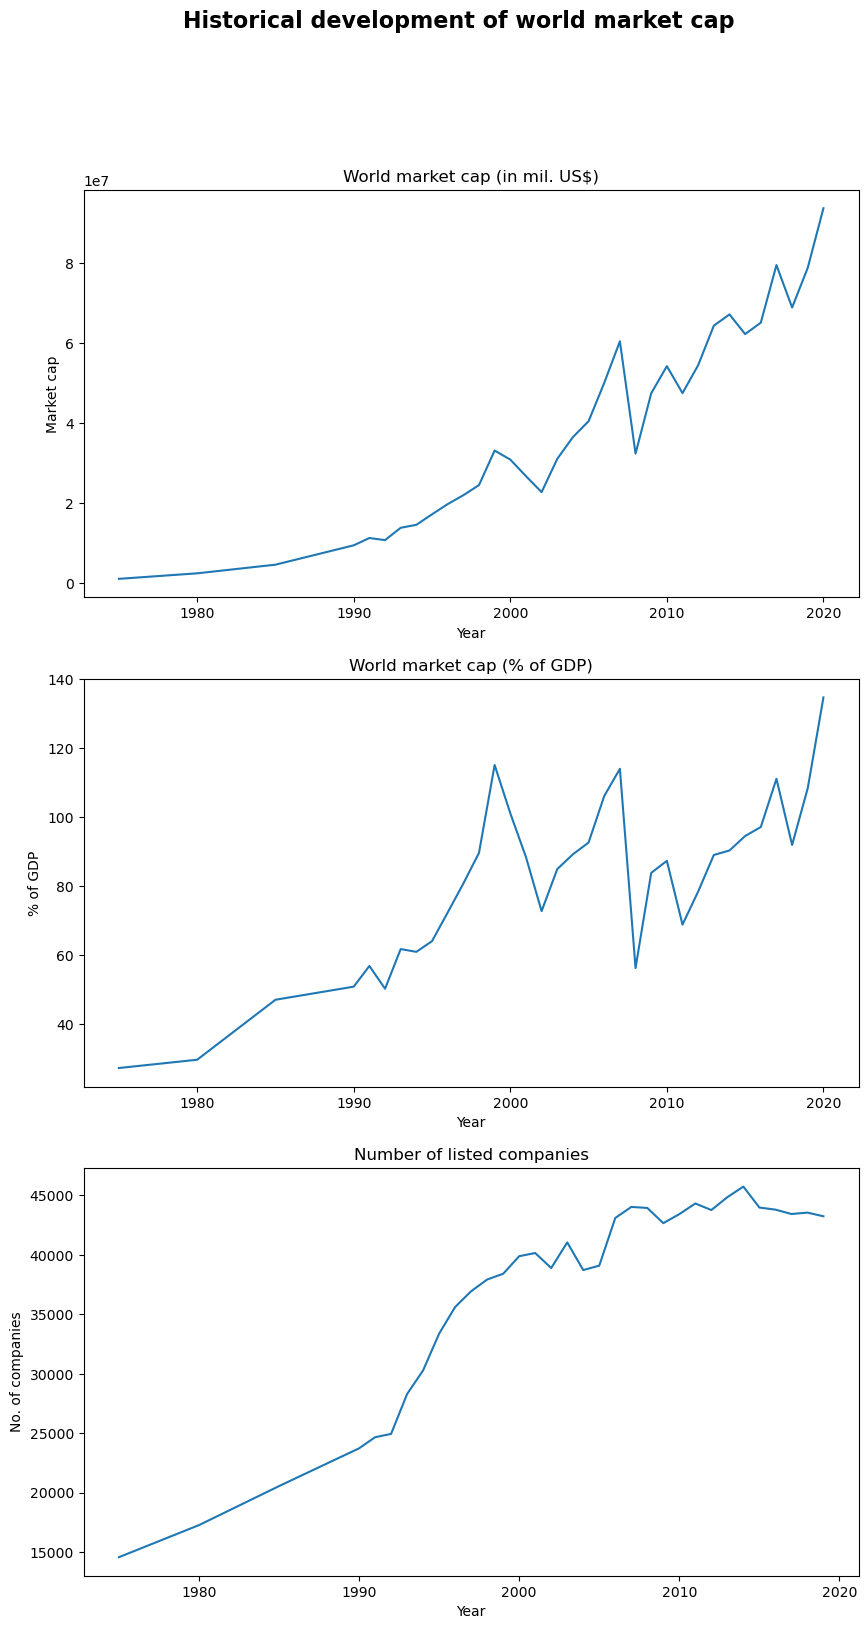

In [12]:
# Plot Historical development of world market cap
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
                                    ncols=1,
                                    figsize=(10,18))
ax0.plot(world_df['Year'],world_df['World market cap (in mil. US$)'])
# Add some labels and title
ax0.set(title="World market cap (in mil. US$)",
       xlabel="Year",
       ylabel="Market cap")


ax1.plot(world_df['Year'],world_df['World market cap (% of GDP)'])
# Add some labels and title
ax1.set(title="World market cap (% of GDP)",
       xlabel="Year",
       ylabel="% of GDP")


ax2.plot(world_df['Year'],world_df['Number of listed companies'])
# Add some labels and title
ax2.set(title="Number of listed companies",
       xlabel="Year",
       ylabel="No. of companies")

fig.suptitle("Historical development of world market cap", fontsize=16, fontweight="bold");

# Great Recession Analysis
There are 2 crisis that we can see the impact from plot. The market capitalization and % of GDP are decreased.

<u>Year 2000</u>, The dot-com bubble (or dot-com boom) was a stock market bubble in the late 1990s. The period coincided with massive growth in Internet adoption, a proliferation of available venture capital, and the rapid growth of valuations in new dot-com startups.

<u>Year 2008</u>, The United States subprime mortgage crisis was a multinational financial crisis that occurred between 2007 and 2010 that contributed to the 2007–2008 global financial crisis. The crisis led to a severe economic recession, with millions of people losing their jobs and many businesses going bankrupt. The U.S. government intervened with a series of measures to stabilize the financial system, including the Troubled Asset Relief Program (TARP) and the American Recovery and Reinvestment Act (ARRA).

# Conclusion

## First section
You can see that there are 3 topics which can visualize the stock market cap data.
* Selenium to get Stock Market Capitalization
* pycountry to generate ISO alpha 3 country code
* plotly to plot Choropleth map

## Second section
I provide the single cell to customize the subplot
* Historical development of world market cap with 3 subplots